### Data Collection

In [3]:
# load those necessary libraries and packages for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# load the dataset into a pandas DataFrame
house_price = pd.read_csv('Housing.csv.zip')
# converting the date column to datetime format for better analysis
house_price["date"] = pd.to_datetime(house_price["date"])

In [4]:
# display the first 5 rows of the dataset to understand the structure of the data
house_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Exploration and Visualization

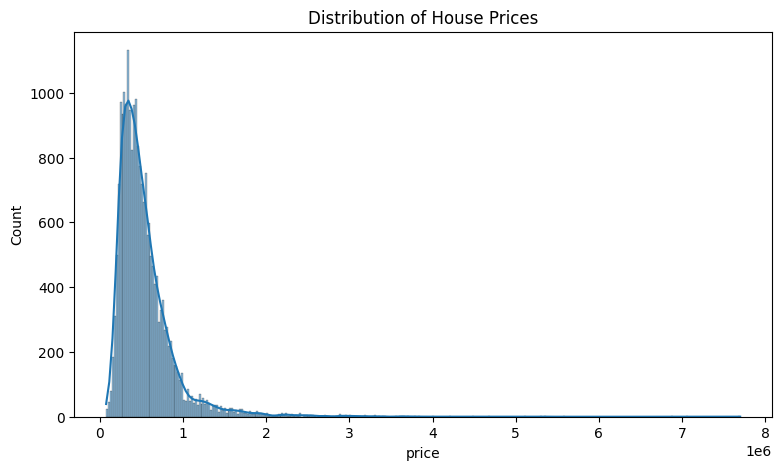

In [6]:
# visualize the distribution of house prices with a histogram and a kernel density estimate plot (KDE)
plt.figure(figsize = (9, 5))
sns.histplot(house_price["price"], kde = True)
plt.title("Distribution of House Prices")
plt.show()

Based on this visualization, we can observe that the distribution of house prices is right-skewed, with a peak around $500,000. The KDE plot provides a smooth estimate of the probability density function of the data. By analyzing the distribution of house prices, we can identify the central tendency and spread of prices in the dataset. This information can be valuable for understanding the price range of houses and identifying any potential outliers. Additionally, it can help us make informed decisions regarding pricing strategies and market trends.

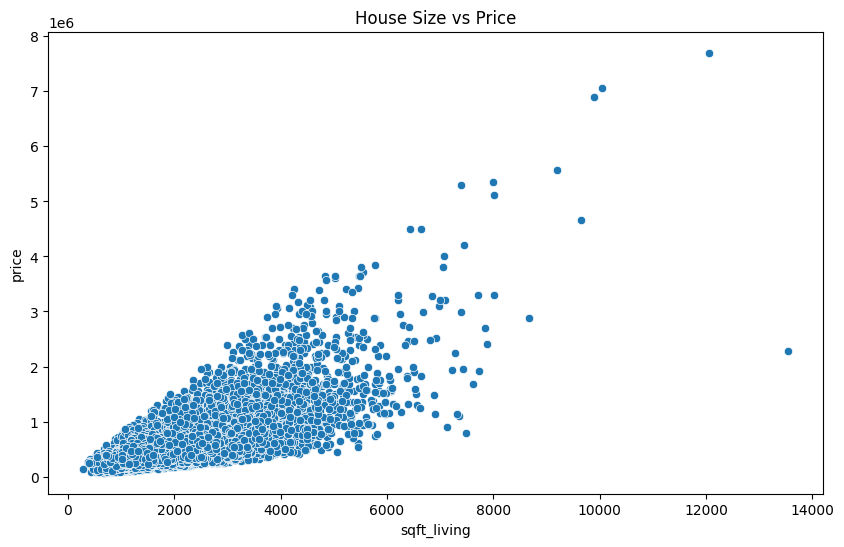

In [7]:
# visualize the relationship between the square footage of living space and the price of the house using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x = "sqft_living", y = "price", data = house_price)
plt.title("House Size vs Price")
plt.show()

Based on this scatter plot, we can see a positive linear relationship between the square footage of living space and the price of the house. As the living space increases, the price tends to increase as well. If the square footage of living space is getting larger, the price of the house is also getting higher. It indicates that the size of the house is an important factor in determining the price. If we want to predict the price of a house, we should consider the size of the house as a feature in our model. Additionally, if we implement a linear regression model, the size of the house will likely have a significant coefficient in the model.

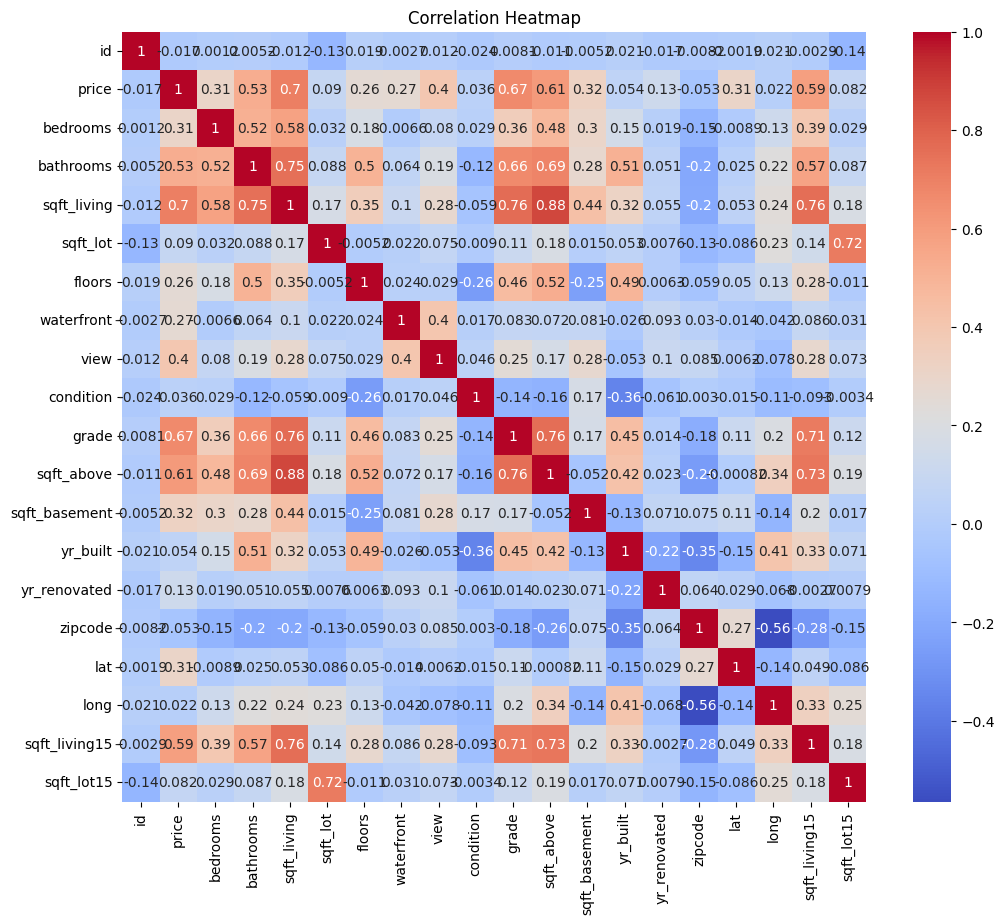

In [10]:
# visualize the correlation between numerical features using a heatmap of the correlation matrix
numeric_cols = house_price.select_dtypes(include = [np.number])
plt.figure(figsize = (12, 10))
sns.heatmap(numeric_cols.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Based on this heatmap, we can observe the following correlations: these are the correlation between the features of the dataset and the price of the house. For instance, those variables as bedrooms, bathrooms, sqft_living, floors, waterfront, view, grade, sqft_above, sqft_basement, lat, and sqft_living15 have a positive correlation with the price of the house. On the other hand, those variables as id, date, and long have a negative correlation with the price of the house. The correlation matrix provides valuable insights into the relationships between different features and the target variable (price). Therefore, it can help us identify the most important features for predicting house prices.

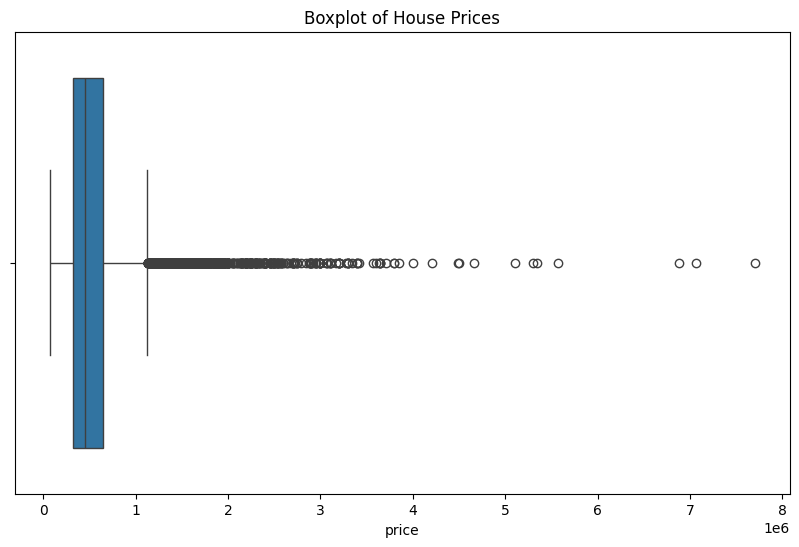

In [11]:
# visualize the distribution of house prices using a boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(x = house_price["price"])
plt.title("Boxplot of House Prices")
plt.show()

Based on this visualization, we can observe the distribution of house prices using a boxplot. The boxplot provides a summary of the distribution, including the median, quartiles, and potential outliers. In this case, we can see that there are several outliers on the higher end of the price range. These outliers represent houses with significantly higher prices compared to the rest of the dataset. By visualizing the distribution of house prices, we can better understand the spread of prices and identify any potential outliers that may need to be addressed in our analysis.

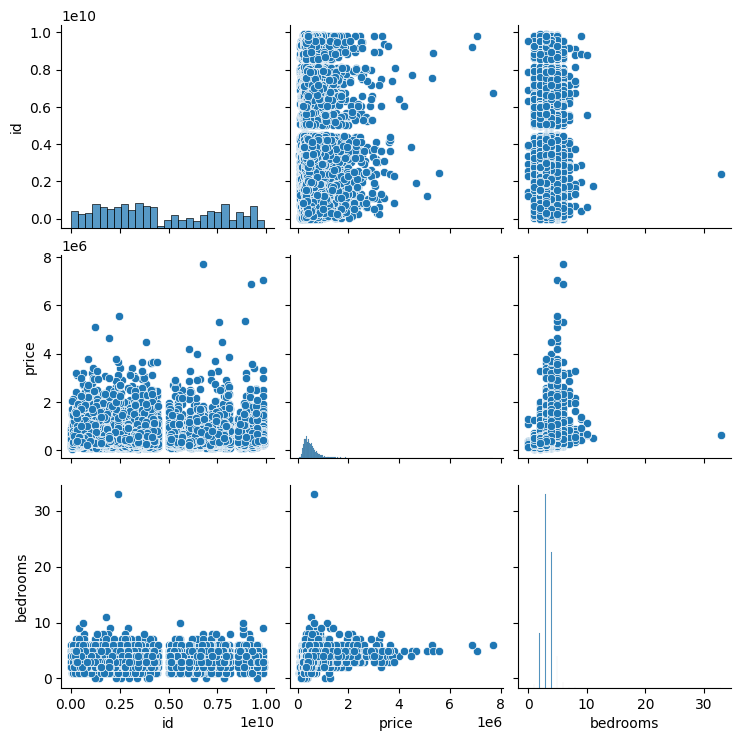

In [12]:
cols = house_price.columns[:4]
sns.pairplot(house_price[cols])
plt.show()

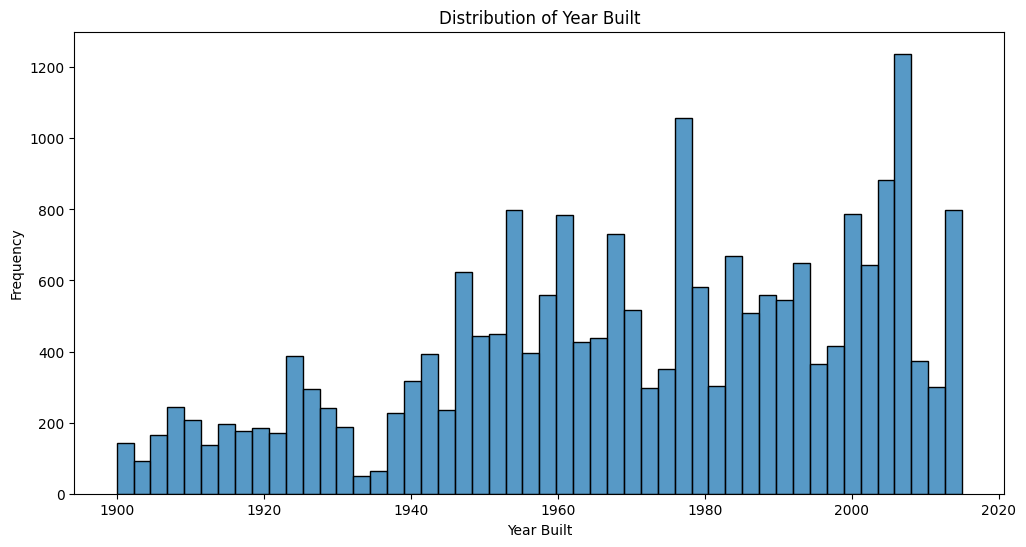

In [13]:
# visualize the house built year distribution using a histogram with 50 bins
plt.figure(figsize = (12, 6))
sns.histplot(house_price["yr_built"], bins = 50, kde = False)
plt.title("Distribution of Year Built")
plt.xlabel("Year Built")
plt.ylabel("Frequency")
plt.show()

Based on this visualization, we can observe the distribution of the year built for the houses in the dataset. The histogram shows the frequency of houses built in different years, with the number of bins set to 50 for better granularity. By analyzing this distribution, we can identify any patterns or trends in the construction of houses over time. This information can be valuable for understanding the age of the housing stock and its impact on prices. Additionally, it can help us identify any potential outliers or anomalies in the dataset.

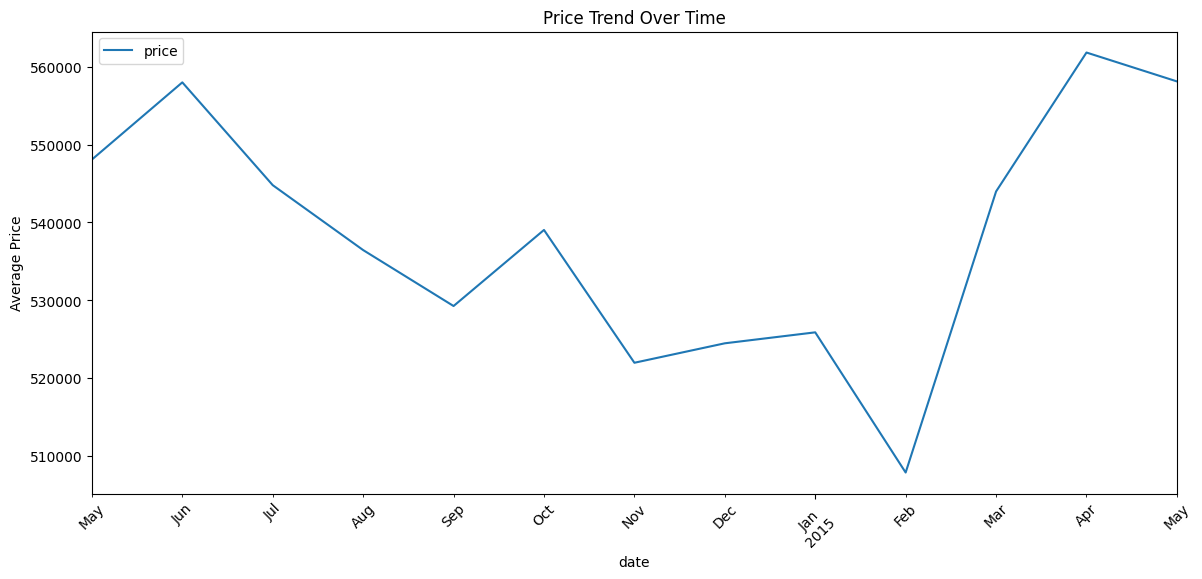

In [14]:
# create a copy of the dataframe with only the necessary columns
price_trend = house_price[["date", "price"]].copy()
# set date as the index
price_trend.set_index("date", inplace = True)
# group by year and month and calculate the mean price
price_trend = price_trend.resample("M").mean()
# plotting the price trend over time
price_trend.plot(kind = "line", figsize = (14, 6), title = "Price Trend Over Time", ylabel = "Average Price", rot = 45)
plt.show()

Based on this visualization, we can observe the trend in house prices over time. The line plot shows the average price of houses over monthly intervals. By analyzing this trend, we can identify any patterns or seasonality in the housing market. This information can be valuable for understanding the dynamics of the real estate market and making informed decisions regarding buying or selling properties. Additionally, it can help us predict future price movements based on historical data.

### Feature Engineering

In [15]:
# select those features that have a high correlation with the price of the house
selected_features = ["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view", "grade", "sqft_above", "sqft_basement", "lat", "sqft_living15"]
# create a new dataframe with the selected features
house_features = house_price[selected_features]

### Model Development (Multi-Linear Regression)

In [16]:
# split the data into training, validation, and testing sets
# split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(house_features, house_price["price"], test_size=0.3, random_state=42)

# split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# create a linear regression model
model = LinearRegression()
# fit the model on the training data
model.fit(X_train, y_train)

# make predictions on the validation data
y_pred_val = model.predict(X_val)

In [17]:
# evaluate the model performance on the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"Mean Squared Error (Validation): {mse_val}")
print(f"R-squared (Validation): {r2_val}")

Mean Squared Error (Validation): 45234656110.98729
R-squared (Validation): 0.6580402361220055


In [18]:
# make predictions on the testing data
y_pred_test = model.predict(X_test)

# evaluate the model performance on the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error (Test): {mse_test}")
print(f"R-squared (Test): {r2_test}")

Mean Squared Error (Test): 54528780294.80774
R-squared (Test): 0.6513742460168422


Based on the returned Mean Squared Error and R-squared, we can observe that the model was predicting slightly bad with a high MSE value and a low R-squared value.

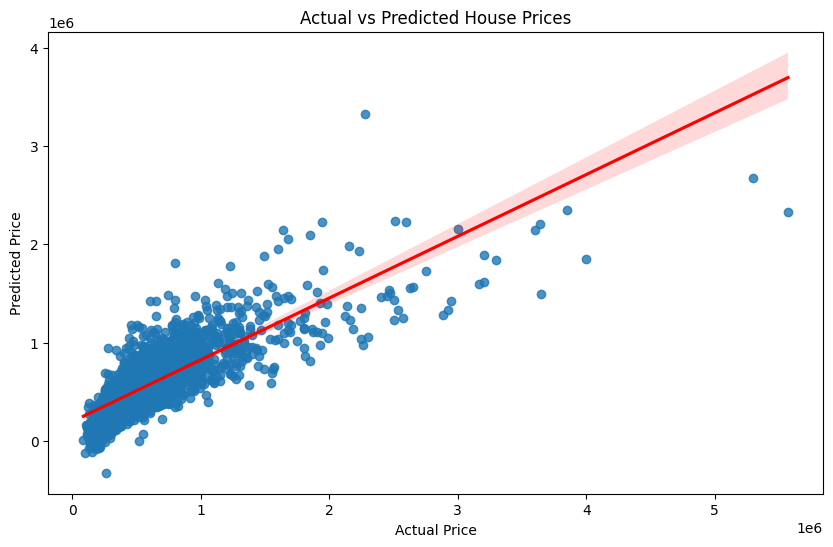

In [19]:
# visualize the actual vs predicted house prices using a scatter plot with a regression line
plt.figure(figsize = (10, 6))
sns.regplot(x = y_test, y = y_pred_test, line_kws = {"color": "red"})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

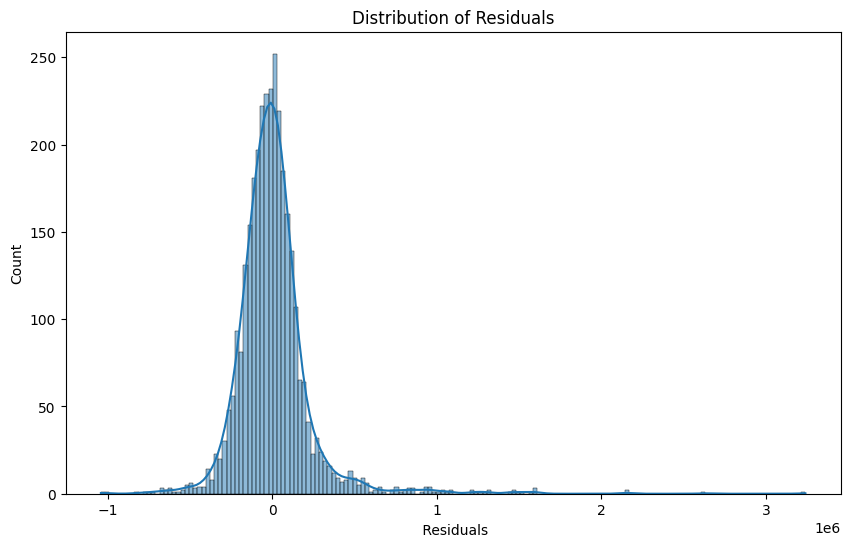

In [20]:
# calculate the residuals
residuals = y_test - y_pred_test

# visualize the distribution of residuals using a histogram and a KDE plot
plt.figure(figsize = (10, 6))
sns.histplot(residuals, kde = True)
plt.xlabel(" Residuals")
plt.title("Distribution of Residuals")
plt.show()

Based on this visualization, we can observe the distribution of residuals from the linear regression model. The histogram and KDE plot show the frequency and density of residuals, which represent the differences between the actual and predicted house prices. By analyzing the distribution of residuals, we can evaluate the performance of the model and identify any patterns or trends in the errors. This information can be valuable for understanding the accuracy and reliability of the model in predicting house prices.

### Model Development (Multi-Layer Perceptron)

In [21]:
# convert the date column to timestamp format for better processing
house_price["date"] = house_price["date"].apply(lambda x : x.timestamp())
# split the data into training, validation, and testing sets
features = house_price.drop("price", axis = 1)
target = house_price["price"]
# split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size = 0.3, random_state = 42)
# split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [22]:
# scale the features using StandardScaler
scaler = StandardScaler()
# fit the scaler on the training data and transform the training, validation, and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [23]:
# create a feedforward neural network model using MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes = (100, 50), activation = "relu", solver = "adam", max_iter = 3500, tol = 0.0001, random_state = 42)

# fit the model on the training data and validate it on the validation data
nn_model.fit(X_train_scaled, y_train)

# make predictions on the scaled validation data
y_pred_val = nn_model.predict(X_val_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [24]:
# evaluate the model performance on the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"Mean Squared Error (Validation): {mse_val}")
print(f"R-squared (Validation): {r2_val}")

Mean Squared Error (Validation): 25549202179.811913
R-squared (Validation): 0.8068560724051245


In [25]:
# make predictions on the scaled testing data
y_pred_test = nn_model.predict(X_test_scaled)

# evaluate the model performance on the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error (Test): {mse_test}")
print(f"R-squared (Test): {r2_test}")

Mean Squared Error (Test): 29273495501.595356
R-squared (Test): 0.812842055410177


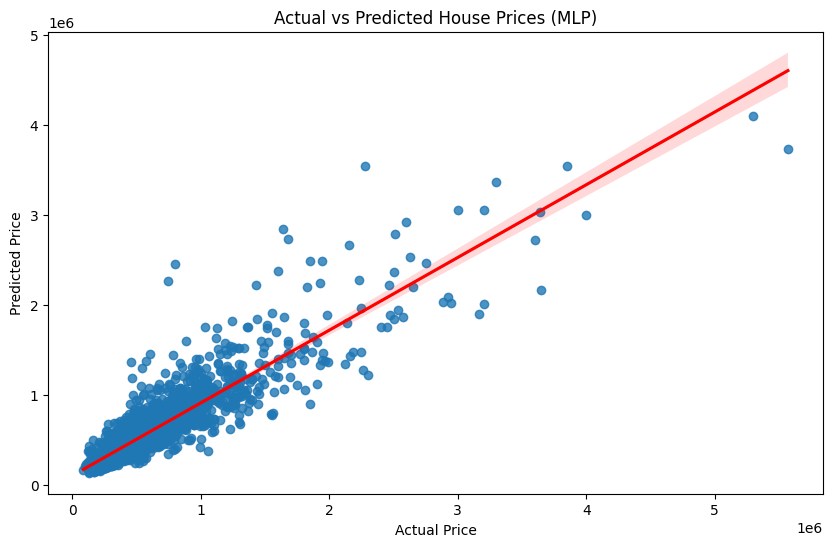

In [26]:
# visualize the actual vs predicted house prices using a scatter plot with a regression line
plt.figure(figsize = (10, 6))
sns.regplot(x = y_test, y = y_pred_test, line_kws = {"color" : "red"})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (MLP)")
plt.show()

In conclusion, we have developed two models to predict house prices based on the given dataset. The first model is a Multi-Linear Regression model, which uses a linear combination of features to predict house prices. The second model is a Multi-Layer Perceptron (MLP) model, which is a type of feedforward neural network that can capture complex relationships in the data. By comparing the performance of these two models, we can evaluate their accuracy and reliability in predicting house prices. Based on the evaluation metrics (Mean Squared Error and R-squared), we can determine which model performs better and choose the most suitable model for predicting house prices. Additionally, by analyzing the residuals and visualizing the actual vs predicted prices, we can gain insights into the accuracy and reliability of the models. This information can be valuable for making informed decisions in the real estate market and understanding the factors that influence house prices.

Based on the return result, we can observe that the MLP model was predicting better than the Linear Regression model with a lower MSE value and a higher R-squared value. It indicates that the MLP model has a better performance in predicting house prices compared to the Linear Regression model. Therefore, we can conclude that the MLP model is more suitable for predicting house prices based on the given dataset. By analyzing the performance of these models, we can gain insights into the accuracy and reliability of the predictions and make informed decisions in the real estate market.